<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importación-de-paquetes" data-toc-modified-id="Importación-de-paquetes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importación de paquetes</a></span></li><li><span><a href="#Leemos-los-datos" data-toc-modified-id="Leemos-los-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Leemos los datos</a></span></li><li><span><a href="#Recomendaciones-para-la-exploración-de-datos" data-toc-modified-id="Recomendaciones-para-la-exploración-de-datos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Recomendaciones para la exploración de datos</a></span><ul class="toc-item"><li><span><a href="#Cómo-está-la-información" data-toc-modified-id="Cómo-está-la-información-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cómo está la información</a></span></li><li><span><a href="#Valores-de-variables-cualitativas" data-toc-modified-id="Valores-de-variables-cualitativas-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Valores de variables cualitativas</a></span></li><li><span><a href="#Estadísticos-fundamentales" data-toc-modified-id="Estadísticos-fundamentales-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Estadísticos fundamentales</a></span></li><li><span><a href="#Empecemos-con-la-visualización" data-toc-modified-id="Empecemos-con-la-visualización-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Empecemos con la visualización</a></span></li></ul></li><li><span><a href="#Comparar-Variables" data-toc-modified-id="Comparar-Variables-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparar Variables</a></span></li><li><span><a href="#También-podemos-hacer-mapas" data-toc-modified-id="También-podemos-hacer-mapas-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>También podemos hacer mapas</a></span></li></ul></div>

# Comenzando una exploración de datos - Parte 1

Una fase fundamental en la ciencia de datos es la exploración, en este proceso se reconocen variables relacionadas, algunas hipótesis empiezan a ser planteadas y se buscan algunas bases auxiliares.

En el ejercicio del día de hoy vamos a iniciar el procesamiento de la base del SECOP II con la intención de brindarles algunas herramientas que puedan llegar a ser de utilidad en procesos posteriores.

## Importación de paquetes

Siempre desde el inicio creamos una celda de importación paquetes. Si bien, más adelante es posible que importemos algo más, dejarlo aquí  permite una buena fluidez de trabajo y además nos facilita la creación de un archivo `.py`.

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics
from scipy import stats

import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact
import ipywidgets as widgets

%matplotlib inline
sns.set()

## Leemos los datos
Para este caso descargamos la base y la leemos de manera local, la base debe estar en el mismo directorio del cuaderno para llamarlo directamente.

In [2]:
pd.options.display.float_format = '{:}'.format
df = pd.read_csv('https://raw.githubusercontent.com/madcentral/metodosestadisticos/master/cuadernos/SECOP_muestra.csv')

Utilizaremos una muestra para tener una clase fluida, sin embargo, con un poquito más de procesamiento Python puede procesar esta base de algo más de 700.000 registros.

In [3]:
df=df.reset_index(drop=True)
df=df[df.columns[1:]]

In [4]:
df

Nombre Entidad  Nit Entidad  \
0     MUNICIPIO DE SANTIAGO DE CALI - SECRETARIA DE ...    890399011   
1     DISTRITO ESPECIAL INDUSTRIAL Y PORTUARIO DE BA...    890102018   
2     MUNICIPIO DE SANTIAGO DE CALI - DEPARTAMENTO A...    890399011   
3                                  ICBF REGIONAL BOGOTA    899999239   
4     DEPARTAMENTO ADMINISTRATIVO NACIONAL DE ESTADI...    899999027   
...                                                 ...          ...   
9995                               ICBF REGIONAL BOGOTA    899999239   
9996                ALCALDIA MUNICIPIO DE VILLAVICENCIO    892099324   
9997         AGENCIA LOGISTICA DE LAS FUERZAS MILITARES    899999162   
9998                     MUNICIPIO DE ARMENIA - QUINDIO    890000464   
9999                                ICBF REGIONAL CESAR    899999239   

                    Departamento         Ciudad  \
0                Valle del Cauca           Cali   
1                      Atlántico   Barranquilla   
2                Valle del Cauca           Cali   
3     Distrito Capital de Bogotá         Bogotá   
4     Distrito Capital de Bogotá         Bogotá   
...                          ...            ...   
9995  Distrito Capital de Bogotá         Bogotá   
9996                        Meta  Villavicencio   
9997  Distrito Capital de Bogotá         Bogotá   
9998                     Quindío        Armenia   
9999                       Cesar     Valledupar   

                              Localización        Orden  \
0       Colombia,  Valle del Cauca ,  Cali  Territorial   
1     Colombia,  Atlántico ,  Barranquilla  Territorial   
2       Colombia,  Valle del Cauca ,  Cali  Territorial   
3                 Colombia, Bogotá, Bogotá     Nacional   
4                 Colombia, Bogotá, Bogotá     Nacional   
...                                    ...          ...   
9995              Colombia, Bogotá, Bogotá     Nacional   
9996      Colombia,  Meta ,  Villavicencio  Territorial   
9997              Colombia, Bogotá, Bogotá     Nacional   
9998         Colombia,  Quindío ,  Armenia  Territorial   
9999        Colombia,  Cesar ,  Valledupar     Nacional   

                         Sector                  Rama Entidad Centralizada  \
0        No aplica/No pertenece             Ejecutivo         Centralizada   
1              Servicio Público             Ejecutivo      Descentralizada   
2              Servicio Público             Ejecutivo         Centralizada   
3     Salud y Protección Social  Corporación Autónoma      Descentralizada   
4       Información Estadística             Ejecutivo         Centralizada   
...                         ...                   ...                  ...   
9995  Salud y Protección Social  Corporación Autónoma      Descentralizada   
9996     No aplica/No pertenece             Ejecutivo         Centralizada   
9997                    defensa             Ejecutivo      Descentralizada   
9998           Servicio Público             Ejecutivo      Descentralizada   
9999  Salud y Protección Social             Ejecutivo         Centralizada   

     Proceso de Compra  ... Anno BPIN    Saldo CDP Saldo Vigencia  \
0     CO1.BDOS.1348834  ...      2020  106108936.0              0   
1     CO1.BDOS.1364592  ...      2020  400620000.0              0   
2      CO1.BDOS.454808  ...      2018 1473240000.0              0   
3     CO1.BDOS.1121615  ...      2018          0.0              0   
4      CO1.BDOS.697324  ...      2019   62106000.0              0   
...                ...  ...       ...          ...            ...   
9995  CO1.BDOS.1036432  ...      2020   17339020.0              0   
9996  CO1.BDOS.1438084  ...      2020   16000000.0              0   
9997   CO1.BDOS.772361  ...       N/D 3000000000.0              0   
9998  CO1.BDOS.1292121  ...      2020    5000000.0              0   
9999  CO1.BDOS.1055730  ...      2020   12809080.0              0   

     EsPostConflicto                                         URLProceso  \
0            

In [5]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.show()

## Recomendaciones para la exploración de datos

1. En este caso es muy importante reconocer que usted no está creando un reporte, pues hasta ahora está conociendo y validando la información que tiene en su base. No tenga miedo de hacer gráficas que posteriormente desechará, pues usted no tiene claridad de donde está la información determinante para sus hpótesis o problemas.

2. Las herramientas visuales son fundamentales, explore las diferentes galerias propuestas por los paquetes para tener una referencia en código de lo que se le ocurre hacer.

    Ver:
    - [Matplotlib](https://matplotlib.org/gallery/index.html)
    - [Seaborn](https://seaborn.pydata.org/examples/index.html)
    - [D3- Python Graph Gallery](https://python-graph-gallery.com/)
    - [From Data To Viz](https://www.data-to-viz.com/)
    - [Plotly Express](https://plotly.com/python/plotly-express/)
    
    
3. En este ejemplo en particular necesitaremnos una base adicional para crear los mapas, identificar la información faltante y buscarla también hace parte de este proceso.

### Cómo está la información

Un primer paso en la exploración consiste en identificar la información a tratar. En este caso calculamos tamaños, buscamos información de las variables y visualizamos la disponibilidad de los datos.

In [6]:
df.shape

(10000, 54)

In [9]:
df['Orden'].value_counts()

Territorial             5030
Nacional                4905
Corporación Autónoma      65
Name: Orden, dtype: int64

In [8]:
df.Orden

0       Territorial
1       Territorial
2       Territorial
3          Nacional
4          Nacional
           ...     
9995       Nacional
9996    Territorial
9997       Nacional
9998    Territorial
9999       Nacional
Name: Orden, Length: 10000, dtype: object

In [11]:
df.dtypes

Nombre Entidad                              object
Nit Entidad                                  int64
Departamento                                object
Ciudad                                      object
Localización                                object
Orden                                       object
Sector                                      object
Rama                                        object
Entidad Centralizada                        object
Proceso de Compra                           object
ID Contrato                                 object
Referencia del Contrato                     object
Estado Contrato                             object
Codigo de Categoria Principal               object
Descripcion del Proceso                     object
Tipo de Contrato                            object
Modalidad de Contratacion                   object
Justificacion Modalidad de Contratacion     object
Fecha de Firma                              object
Fecha de Inicio del Contrato   

In [12]:
df.info(null_counts=None,)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Nombre Entidad                           10000 non-null  object 
 1   Nit Entidad                              10000 non-null  int64  
 2   Departamento                             10000 non-null  object 
 3   Ciudad                                   10000 non-null  object 
 4   Localización                             10000 non-null  object 
 5   Orden                                    10000 non-null  object 
 6   Sector                                   10000 non-null  object 
 7   Rama                                     10000 non-null  object 
 8   Entidad Centralizada                     10000 non-null  object 
 9   Proceso de Compra                        10000 non-null  object 
 10  ID Contrato                              10000 

Aunque el comando anterior permite contar la cantidad de NAN en cada columna, el siguiente gráfico nos permite visualizar la distribución de dichos datos pérdidos.

In [13]:
df.isnull()

Nombre Entidad  Nit Entidad  Departamento  Ciudad  Localización  Orden  \
0              False        False         False   False         False  False   
1              False        False         False   False         False  False   
2              False        False         False   False         False  False   
3              False        False         False   False         False  False   
4              False        False         False   False         False  False   
...              ...          ...           ...     ...           ...    ...   
9995           False        False         False   False         False  False   
9996           False        False         False   False         False  False   
9997           False        False         False   False         False  False   
9998           False        False         False   False         False  False   
9999           False        False         False   False         False  False   

      Sector   Rama  Entidad Centralizada  Proceso de Compra  ...  Anno BPIN  \
0      False  False                 False              False  ...      False   
1      False  False                 False              False  ...      False   
2      False  False                 False              False  ...      False   
3      False  False                 False              False  ...      False   
4      False  False                 False              False  ...      False   
...      ...    ...                   ...                ...  ...        ...   
9995   False  False                 False              False  ...      False   
9996   False  False                 False              False  ...      False   
9997   False  False                 False              False  ...      False   
9998   False  False                 False              False  ...      False   
9999   False  False                 False              False  ...      False   

      Saldo CDP  Saldo Vigencia  EsPostConflicto  URLProceso  Destino Gasto  \
0         False           False            False       False          False   
1         False           False            False       False          False   
2         False           False            False       False          False   
3         False           False            False       False          False   
4         False           False            False       False          False   
...         ...             ...              ...         ...            ...   
9995      False           False            False       False          False   
9996      False           False            False       False          False   
9997      False           False            False       False          False   
9998      False           False            False       False          False   
9999      False           False            False       False          False   

      Origen de los Recursos  Dias Adicionados  Puntos del Acuerdo  \
0                      False             False               False   
1                      False             False               False   
2                      False             False               False   
3                      False             False               False   
4                      False             False               False   
...                      ...               ...                 ...   
9995                   False             False               False   
9996                   False             False               False   
9997                   False             False               False   
9998                   False             False               False   
9999                   False             False               False   

      Pilares del Acuerdo  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False  
...                   ...  
9995                False  
9996                False  
9997                False  
9998          

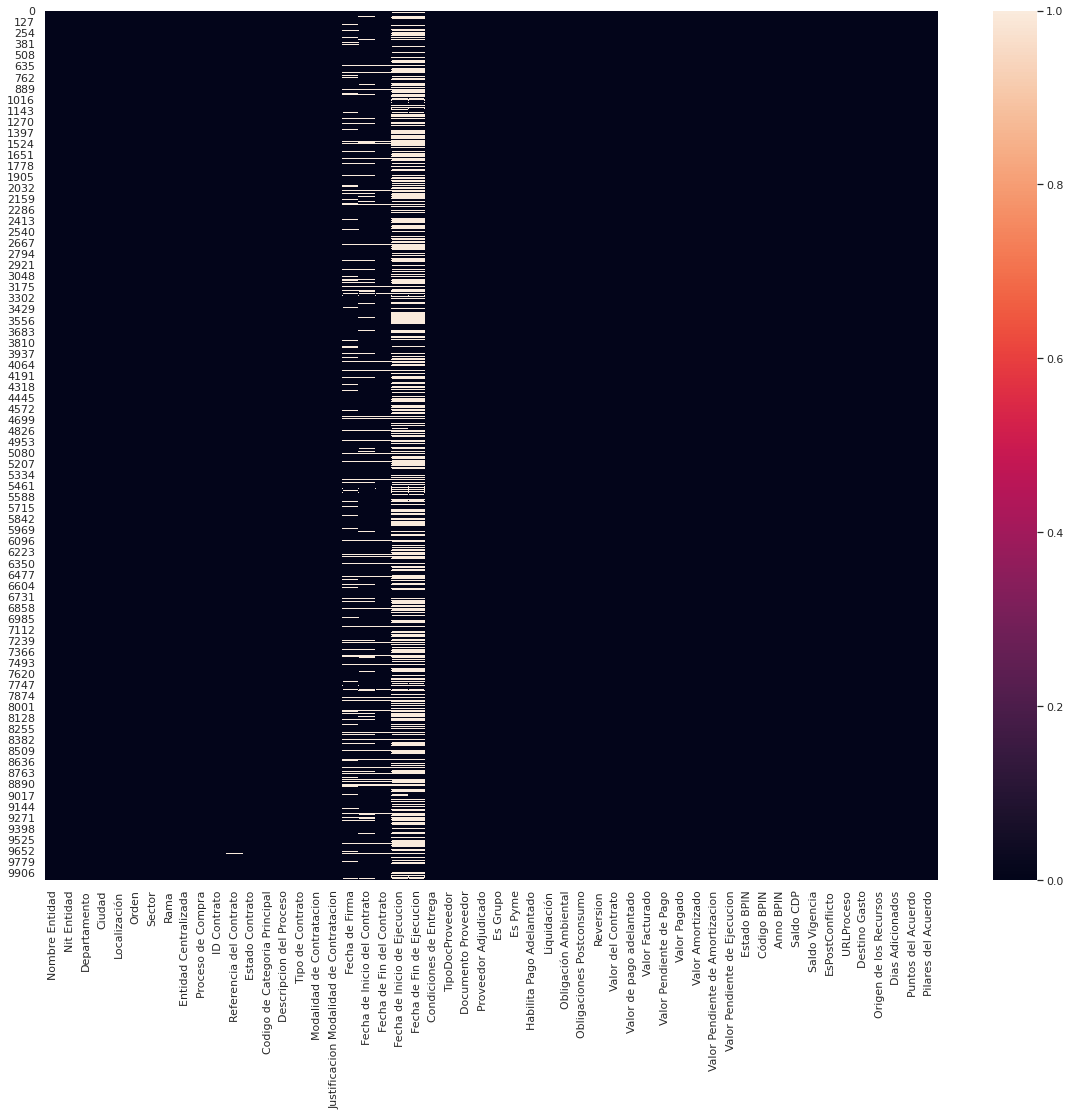

In [14]:
#Análisis de datos pérdidos
fig, axs = plt.subplots(figsize=(20,16))
sns.heatmap(df.isnull(), ax = axs)
axs.set_xticklabels(df.columns, rotation=90);

### Valores de variables cualitativas

Usemos otro gráfico para determinar las categorías de las variables cualitativas:



In [15]:
cualicolumns=df.select_dtypes(exclude=['int64','float64']).columns
print(cualicolumns)
Fechas=[i for i in cualicolumns if i.count('Fecha')>0]
cualicolumns=[i for i in cualicolumns if i.count('Fecha')<=0]

Index(['Nombre Entidad', 'Departamento', 'Ciudad', 'Localización', 'Orden',
       'Sector', 'Rama', 'Entidad Centralizada', 'Proceso de Compra',
       'ID Contrato', 'Referencia del Contrato', 'Estado Contrato',
       'Codigo de Categoria Principal', 'Descripcion del Proceso',
       'Tipo de Contrato', 'Modalidad de Contratacion',
       'Justificacion Modalidad de Contratacion', 'Fecha de Firma',
       'Fecha de Inicio del Contrato', 'Fecha de Fin del Contrato',
       'Fecha de Inicio de Ejecucion', 'Fecha de Fin de Ejecucion',
       'Condiciones de Entrega', 'TipoDocProveedor', 'Documento Proveedor',
       'Proveedor Adjudicado', 'Es Grupo', 'Es Pyme',
       'Habilita Pago Adelantado', 'Liquidación', 'Obligación Ambiental',
       'Obligaciones Postconsumo', 'Reversion', 'Estado BPIN', 'Código BPIN',
       'Anno BPIN', 'EsPostConflicto', 'URLProceso', 'Destino Gasto',
       'Origen de los Recursos', 'Puntos del Acuerdo', 'Pilares del Acuerdo'],
      dtype='object')


In [16]:
Fechas

['Fecha de Firma',
 'Fecha de Inicio del Contrato',
 'Fecha de Fin del Contrato',
 'Fecha de Inicio de Ejecucion',
 'Fecha de Fin de Ejecucion']

In [17]:
len(cualicolumns)

37

In [18]:
df['EsPostConflicto'].value_counts()

No    9891
Si     100
ND       9
Name: EsPostConflicto, dtype: int64

In [19]:
df

Nombre Entidad  Nit Entidad  \
0                           CAJA DE LA VIVIENDA POPULAR    899999074   
1                   ALCALDIA MUNICIPIO DE VILLAVICENCIO    892099324   
2                 ESE HOSPITAL SAN RAFAEL DE FUSAGASUGÁ    890680025   
3                              GOBERNACIÓN DE SANTANDER    890201235   
4               MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL    900474727   
...                                                 ...          ...   
9995                          DEPARTAMENTO DE ANTIOQUIA    890900286   
9996  INSTITUTO DE FINANCIAMIENTO  PROMOCION Y DESAR...    890700755   
9997      Secretaria Distrital de Integración social...   8999990611   
9998                         TERMINAL DE TRANSPORTE S.A    860052155   
9999  UNIDAD ADMINISTRATIVA ESPECIAL MIGRACION COLOMBIA    900477235   

                    Departamento         Ciudad  \
0     Distrito Capital de Bogotá         Bogotá   
1                           Meta  Villavicencio   
2                   Cundinamarca     Fusagasugá   
3                      Santander    Bucaramanga   
4     Distrito Capital de Bogotá    No Definido   
...                          ...            ...   
9995                   Antioquia       Medellín   
9996                      Tolima         Ibagué   
9997  Distrito Capital de Bogotá    No Definido   
9998  Distrito Capital de Bogotá         Bogotá   
9999  Distrito Capital de Bogotá         Bogotá   

                               Localización        Orden  \
0                  Colombia, Bogotá, Bogotá  Territorial   
1          Colombia,  Meta ,  Villavicencio  Territorial   
2     Colombia,  Cundinamarca ,  Fusagasugá  Territorial   
3       Colombia,  Santander ,  Bucaramanga  Territorial   
4                  Colombia, Bogotá, Bogotá     Nacional   
...                                     ...          ...   
9995       Colombia,  Antioquia ,  Medellín  Territorial   
9996            Colombia,  Tolima ,  Ibagué  Territorial   
9997               Colombia, Bogotá, Bogotá  Territorial   
9998               Colombia, Bogotá, Bogotá  Territorial   
9999               Colombia, Bogotá, Bogotá     Nacional   

                                 Sector                  Rama  \
0         Vivienda, Ciudad y Territorio             Ejecutivo   
1                No aplica/No pertenece             Ejecutivo   
2             Salud y Protección Social  Corporación Autónoma   
3                      Servicio Público             Ejecutivo   
4             Salud y Protección Social             Ejecutivo   
...                                 ...                   ...   
9995                   Servicio Público             Ejecutivo   
9996             No aplica/No pertenece             Ejecutivo   
9997  Inclusión Social y Reconciliación             Ejecutivo   
9998                         Transporte             Ejecutivo   
9999              Relaciones Exteriores             Ejecutivo   

     Entidad Centralizada Proceso de Compra  ... Anno BPIN   Saldo CDP  \
0            Centralizada  CO1.BDOS.1254714  ...      2020  10456189.0   
1            Centralizada  CO1.BDOS.1391522  ...      2018  16000000.0   
2         Descentralizada   CO1.BDOS.690153  ...       N/D         0.0   
3            Centralizada  CO1.BDOS.1420922  ...      2020 637070418.0   
4            Centralizada   CO1.BDOS.695980  ...      2019  80882078.0   
...                   ...               ...  ...       ...         ...   
9995          No Definido   CO1.BDOS.529124  ...      2018 167968080.0   
9996      Descentralizada   CO1.BDOS.717535  ...       N/D  40000000.0   
9997         Centralizada  CO1.BDOS.1132710  ...      2020  34184544.0   
9998         Centralizada   CO1.BDOS.632371  ...       N/D  68000000.0   
9999          No Definido   CO1.BDOS.121216  ...      2018  80500000.0   

     Saldo Vigencia EsPostConflicto  \
0                 0              No   
1                 0              No   
2                 0              No   
3               

In [22]:
conda install nodejs  -y

Solving environment: done

## Package Plan ##

  environment location: /home/isaac/anaconda3

  added / updated specs:
    - nodejs


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    nodejs-10.13.0             |       he6710b0_0        13.0 MB
    ------------------------------------------------------------
                                           Total:        13.0 MB

The following NEW packages will be INSTALLED:

  nodejs             pkgs/main/linux-64::nodejs-10.13.0-he6710b0_0



nodejs-10.13.0       | 13.0 MB   | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


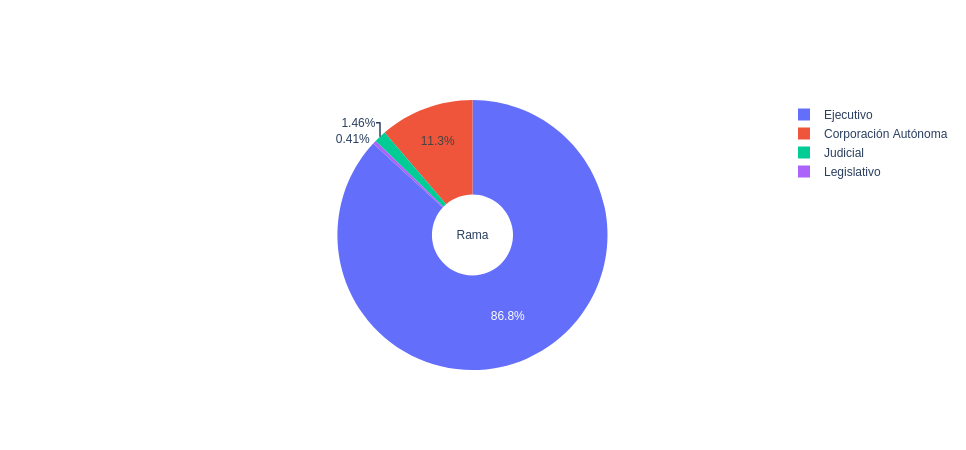

<function __main__.distrib(i)>

In [20]:
def distrib(i):
    Freq=df[i].value_counts()
    if len(df[i].unique())<10:
        fig = go.Figure(data=[go.Pie(labels=Freq.index, values=Freq.values,hole=.3,title=i)])
        fig.show()
    else:
        fig = go.Figure(data=[go.Table(
            columnwidth = [500,100,100],
            header=dict(values=['Categoría','Cantidad','Porcentaje'],
                        fill_color='paleturquoise',
                        align='left'),
            cells=dict(values=[Freq.index, Freq.values,["{:.2%}".format(i) for i in Freq.values/len(df)]],
                       fill_color='lavender',
                       align='left'))
                             ])
        fig.show()
    return

interact(distrib,i=widgets.Dropdown(options=cualicolumns,value='Rama',description='Variable: '))

La exploración sobre la anterior herramienta interactiva nos da más luces por cada variable que podría llegar a ser interesante. A continuación areglaremos las fechas de esta base:

Usaremos la información de la variable `Fecha de Inicio del Contrato` veamos que hay solo 8922 valores permitidos.

In [20]:
df[Fechas]

Fecha de Firma Fecha de Inicio del Contrato Fecha de Fin del Contrato  \
0        05/18/2020                   05/20/2020                07/20/2020   
1        08/18/2020                   08/18/2020                12/29/2020   
2        04/22/2019                   01/02/2019                08/31/2019   
3        08/28/2020                   09/01/2020                12/31/2020   
4        01/29/2019                   01/29/2019                12/01/2019   
...             ...                          ...                       ...   
9995     09/25/2018                   09/13/2018                11/30/2018   
9996     02/04/2019                   01/31/2019                06/30/2019   
9997     02/28/2020                   02/28/2020                03/14/2021   
9998     07/29/2019                   11/29/2018                09/28/2019   
9999     01/24/2017                   01/23/2017                01/01/2018   

     Fecha de Inicio de Ejecucion Fecha de Fin de Ejecucion  
0                             NaN                       NaN  
1                             NaN                       NaN  
2                             NaN                       NaN  
3                             NaN                       NaN  
4                      01/29/2019                11/30/2019  
...                           ...                       ...  
9995                   09/13/2018                11/30/2018  
9996                   01/31/2019                06/30/2019  
9997                          NaN                       NaN  
9998                   11/29/2018                09/28/2019  
9999                   01/23/2017                12/31/2017  

[10000 rows x 5 columns]

In [21]:
for i in Fechas:
    df[i]=pd.to_datetime(df[i])
df[Fechas].dtypes

Fecha de Firma                  datetime64[ns]
Fecha de Inicio del Contrato    datetime64[ns]
Fecha de Fin del Contrato       datetime64[ns]
Fecha de Inicio de Ejecucion    datetime64[ns]
Fecha de Fin de Ejecucion       datetime64[ns]
dtype: object

In [22]:
df[df['Fecha de Inicio del Contrato']>'2000-01-01']

Nombre Entidad  Nit Entidad  \
0                           CAJA DE LA VIVIENDA POPULAR    899999074   
1                   ALCALDIA MUNICIPIO DE VILLAVICENCIO    892099324   
2                 ESE HOSPITAL SAN RAFAEL DE FUSAGASUGÁ    890680025   
3                              GOBERNACIÓN DE SANTANDER    890201235   
4               MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL    900474727   
...                                                 ...          ...   
9995                          DEPARTAMENTO DE ANTIOQUIA    890900286   
9996  INSTITUTO DE FINANCIAMIENTO  PROMOCION Y DESAR...    890700755   
9997      Secretaria Distrital de Integración social...   8999990611   
9998                         TERMINAL DE TRANSPORTE S.A    860052155   
9999  UNIDAD ADMINISTRATIVA ESPECIAL MIGRACION COLOMBIA    900477235   

                    Departamento         Ciudad  \
0     Distrito Capital de Bogotá         Bogotá   
1                           Meta  Villavicencio   
2                   Cundinamarca     Fusagasugá   
3                      Santander    Bucaramanga   
4     Distrito Capital de Bogotá    No Definido   
...                          ...            ...   
9995                   Antioquia       Medellín   
9996                      Tolima         Ibagué   
9997  Distrito Capital de Bogotá    No Definido   
9998  Distrito Capital de Bogotá         Bogotá   
9999  Distrito Capital de Bogotá         Bogotá   

                               Localización        Orden  \
0                  Colombia, Bogotá, Bogotá  Territorial   
1          Colombia,  Meta ,  Villavicencio  Territorial   
2     Colombia,  Cundinamarca ,  Fusagasugá  Territorial   
3       Colombia,  Santander ,  Bucaramanga  Territorial   
4                  Colombia, Bogotá, Bogotá     Nacional   
...                                     ...          ...   
9995       Colombia,  Antioquia ,  Medellín  Territorial   
9996            Colombia,  Tolima ,  Ibagué  Territorial   
9997               Colombia, Bogotá, Bogotá  Territorial   
9998               Colombia, Bogotá, Bogotá  Territorial   
9999               Colombia, Bogotá, Bogotá     Nacional   

                                 Sector                  Rama  \
0         Vivienda, Ciudad y Territorio             Ejecutivo   
1                No aplica/No pertenece             Ejecutivo   
2             Salud y Protección Social  Corporación Autónoma   
3                      Servicio Público             Ejecutivo   
4             Salud y Protección Social             Ejecutivo   
...                                 ...                   ...   
9995                   Servicio Público             Ejecutivo   
9996             No aplica/No pertenece             Ejecutivo   
9997  Inclusión Social y Reconciliación             Ejecutivo   
9998                         Transporte             Ejecutivo   
9999              Relaciones Exteriores             Ejecutivo   

     Entidad Centralizada Proceso de Compra  ... Anno BPIN   Saldo CDP  \
0            Centralizada  CO1.BDOS.1254714  ...      2020  10456189.0   
1            Centralizada  CO1.BDOS.1391522  ...      2018  16000000.0   
2         Descentralizada   CO1.BDOS.690153  ...       N/D         0.0   
3            Centralizada  CO1.BDOS.1420922  ...      2020 637070418.0   
4            Centralizada   CO1.BDOS.695980  ...      2019  80882078.0   
...                   ...               ...  ...       ...         ...   
9995          No Definido   CO1.BDOS.529124  ...      2018 167968080.0   
9996      Descentralizada   CO1.BDOS.717535  ...       N/D  40000000.0   
9997         Centralizada  CO1.BDOS.1132710  ...      2020  34184544.0   
9998         Centralizada   CO1.BDOS.632371  ...       N/D  68000000.0   
9999          No Definido   CO1.BDOS.121216  ...      2018  80500000.0   

     Saldo Vigencia EsPostConflicto  \
0                 0              No   
1                 0              No   
2                 0              No   
3               

Ahora una herramienta interactiva que nos permita filtrar la base por fechas, usamos el `datepicker` de ipywidgets:

In [23]:
widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)

DatePicker(value=None, description='Pick a Date')

In [24]:
s1=widgets.DatePicker(
    description='Inicio: ',
    disabled=False
)

e1=widgets.DatePicker(
    description='Final: ',
    disabled=False
)

def FiltroBase(start,end):
    try:
        start=str(start)
        end=str(end)    
        DF1=df[df['Fecha de Inicio del Contrato']>start]
        DF2=DF1[DF1['Fecha de Inicio del Contrato']<end]
        return DF2
    except:
        print("Ingrese Fechas")
    

interact(FiltroBase,start=s1,end=e1)

interactive(children=(DatePicker(value=None, description='Inicio: '), DatePicker(value=None, description='Fina…

<function __main__.FiltroBase(start, end)>

Haremos un análisis por mes, tratando de identificar cuales fueron los meses más activos en la asignación de contratos por Departamento:

In [25]:
df['Fecha de Inicio del Contrato']

0      2020-05-20
1      2020-08-18
2      2019-01-02
3      2020-09-01
4      2019-01-29
          ...    
9995   2018-09-13
9996   2019-01-31
9997   2020-02-28
9998   2018-11-29
9999   2017-01-23
Name: Fecha de Inicio del Contrato, Length: 10000, dtype: datetime64[ns]

In [26]:
df['Mes_Año']=df['Fecha de Inicio del Contrato'].dt.to_period('M')
df

Nombre Entidad  Nit Entidad  \
0                           CAJA DE LA VIVIENDA POPULAR    899999074   
1                   ALCALDIA MUNICIPIO DE VILLAVICENCIO    892099324   
2                 ESE HOSPITAL SAN RAFAEL DE FUSAGASUGÁ    890680025   
3                              GOBERNACIÓN DE SANTANDER    890201235   
4               MINISTERIO DE SALUD Y PROTECCIÓN SOCIAL    900474727   
...                                                 ...          ...   
9995                          DEPARTAMENTO DE ANTIOQUIA    890900286   
9996  INSTITUTO DE FINANCIAMIENTO  PROMOCION Y DESAR...    890700755   
9997      Secretaria Distrital de Integración social...   8999990611   
9998                         TERMINAL DE TRANSPORTE S.A    860052155   
9999  UNIDAD ADMINISTRATIVA ESPECIAL MIGRACION COLOMBIA    900477235   

                    Departamento         Ciudad  \
0     Distrito Capital de Bogotá         Bogotá   
1                           Meta  Villavicencio   
2                   Cundinamarca     Fusagasugá   
3                      Santander    Bucaramanga   
4     Distrito Capital de Bogotá    No Definido   
...                          ...            ...   
9995                   Antioquia       Medellín   
9996                      Tolima         Ibagué   
9997  Distrito Capital de Bogotá    No Definido   
9998  Distrito Capital de Bogotá         Bogotá   
9999  Distrito Capital de Bogotá         Bogotá   

                               Localización        Orden  \
0                  Colombia, Bogotá, Bogotá  Territorial   
1          Colombia,  Meta ,  Villavicencio  Territorial   
2     Colombia,  Cundinamarca ,  Fusagasugá  Territorial   
3       Colombia,  Santander ,  Bucaramanga  Territorial   
4                  Colombia, Bogotá, Bogotá     Nacional   
...                                     ...          ...   
9995       Colombia,  Antioquia ,  Medellín  Territorial   
9996            Colombia,  Tolima ,  Ibagué  Territorial   
9997               Colombia, Bogotá, Bogotá  Territorial   
9998               Colombia, Bogotá, Bogotá  Territorial   
9999               Colombia, Bogotá, Bogotá     Nacional   

                                 Sector                  Rama  \
0         Vivienda, Ciudad y Territorio             Ejecutivo   
1                No aplica/No pertenece             Ejecutivo   
2             Salud y Protección Social  Corporación Autónoma   
3                      Servicio Público             Ejecutivo   
4             Salud y Protección Social             Ejecutivo   
...                                 ...                   ...   
9995                   Servicio Público             Ejecutivo   
9996             No aplica/No pertenece             Ejecutivo   
9997  Inclusión Social y Reconciliación             Ejecutivo   
9998                         Transporte             Ejecutivo   
9999              Relaciones Exteriores             Ejecutivo   

     Entidad Centralizada Proceso de Compra  ...   Saldo CDP Saldo Vigencia  \
0            Centralizada  CO1.BDOS.1254714  ...  10456189.0              0   
1            Centralizada  CO1.BDOS.1391522  ...  16000000.0              0   
2         Descentralizada   CO1.BDOS.690153  ...         0.0              0   
3            Centralizada  CO1.BDOS.1420922  ... 637070418.0              0   
4            Centralizada   CO1.BDOS.695980  ...  80882078.0              0   
...                   ...               ...  ...         ...            ...   
9995          No Definido   CO1.BDOS.529124  ... 167968080.0              0   
9996      Descentralizada   CO1.BDOS.717535  ...  40000000.0              0   
9997         Centralizada  CO1.BDOS.1132710  ...  34184544.0              0   
9998         Centralizada   CO1.BDOS.632371  ...  68000000.0              0   
9999          No Definido   CO1.BDOS.121216  ...  80500000.0              0   

     EsPostConflicto                                         URLProceso  \
0                 No  https://communi

Aunque cambiamos el formato de fecha, vale la pena crear una tabla pivote para saber que tenemos por departamento:

In [27]:
DFfechas=df.pivot_table(index='Mes_Año',columns='Departamento', values='Ciudad',aggfunc='count')

In [28]:
DFfechas

Departamento  Amazonas  Antioquia  Arauca  Atlántico  Bolívar  Boyacá  Caldas  \
Mes_Año                                                                         
2015-12            NaN        NaN     NaN        NaN      NaN     NaN     NaN   
2016-01            NaN        NaN     NaN        NaN      NaN     NaN     NaN   
2016-02            NaN        NaN     NaN        NaN      NaN     NaN     NaN   
2016-03            NaN        NaN     NaN        NaN      NaN     NaN     NaN   
2016-04            NaN        NaN     NaN        NaN      NaN     NaN     NaN   
...                ...        ...     ...        ...      ...     ...     ...   
2020-08            1.0       14.0     NaN       22.0     14.0    11.0     5.0   
2020-09            1.0        4.0     1.0       17.0     20.0     4.0    11.0   
2020-10            NaN       20.0     1.0       12.0     16.0     7.0    11.0   
2020-11            NaN        9.0     1.0        3.0     11.0     3.0     3.0   
2020-12            NaN        NaN     NaN        NaN      NaN     NaN     NaN   

Departamento  Caquetá  Casanare  Cauca  ...  Putumayo  Quindío  Risaralda  \
Mes_Año                                 ...                                 
2015-12           NaN       NaN    NaN  ...       NaN      NaN        NaN   
2016-01           NaN       NaN    NaN  ...       NaN      NaN        NaN   
2016-02           NaN       NaN    NaN  ...       NaN      NaN        NaN   
2016-03           NaN       NaN    NaN  ...       NaN      NaN        NaN   
2016-04           NaN       NaN    NaN  ...       NaN      NaN        NaN   
...               ...       ...    ...  ...       ...      ...        ...   
2020-08           4.0       7.0    6.0  ...       4.0     12.0       10.0   
2020-09           3.0      16.0    7.0  ...       NaN     17.0       31.0   
2020-10           1.0      10.0    6.0  ...       4.0      7.0       11.0   
2020-11           NaN       2.0    7.0  ...       1.0      5.0        4.0   
2020-12           NaN       NaN    NaN  ...       NaN      NaN        NaN   

Departamento  San Andrés, Providencia y Santa Catalina  Santander  Sucre  \
Mes_Año                                                                    
2015-12                                            NaN        NaN    NaN   
2016-01                                            NaN        NaN    NaN   
2016-02                                            NaN        NaN    NaN   
2016-03                                            NaN        NaN    NaN   
2016-04                                            NaN        NaN    NaN   
...                                                ...        ...    ...   
2020-08                                            1.0        7.0    3.0   
2020-09                                            5.0       13.0    3.0   
2020-10                                            1.0       12.0    2.0   
2020-11                                            2.0       11.0    4.0   
2020-12                                            NaN        NaN    NaN   

Departamento  Tolima  Valle del Cauca  Vaupés  Vichada  
Mes_Año                                                 
2015-12          NaN              NaN     NaN      NaN  
2016-01          NaN              NaN     NaN      NaN  
2016-02          NaN              NaN     NaN      NaN  
2016-03          NaN              NaN     NaN      NaN  
2016-04          NaN              NaN     NaN      NaN  
...              ...              ...     ...      ...  
2020-08          4.0             54.0     NaN      NaN  
2020-09         14.0             15.0     NaN      NaN  
2020-10         17.0             33.0     NaN      NaN  
2020-11          2.0             66.0     NaN      NaN  
2020-12          NaN              1.0     NaN      NaN  

[61 rows x 34 columns]

In [29]:
DFfechas.reset_index(inplace=True)

In [30]:
DFfechas
DFfechas=DFfechas.fillna(0)

Creamos una variable alterna que contenga las Fechas como cadenas de caracteres, para poder gráficar más fácil.

In [31]:
DFfechas['Fecha']=[str(i) for i in DFfechas['Mes_Año']]

In [32]:
DFfechas.columns[1:-1]

Index(['Amazonas', 'Antioquia', 'Arauca', 'Atlántico', 'Bolívar', 'Boyacá',
       'Caldas', 'Caquetá', 'Casanare', 'Cauca', 'Cesar', 'Chocó',
       'Cundinamarca', 'Córdoba', 'Distrito Capital de Bogotá', 'Guainía',
       'Guaviare', 'Huila', 'La Guajira', 'Magdalena', 'Meta', 'Nariño',
       'No Definido', 'Norte de Santander', 'Putumayo', 'Quindío', 'Risaralda',
       'San Andrés, Providencia y Santa Catalina', 'Santander', 'Sucre',
       'Tolima', 'Valle del Cauca', 'Vaupés', 'Vichada'],
      dtype='object', name='Departamento')

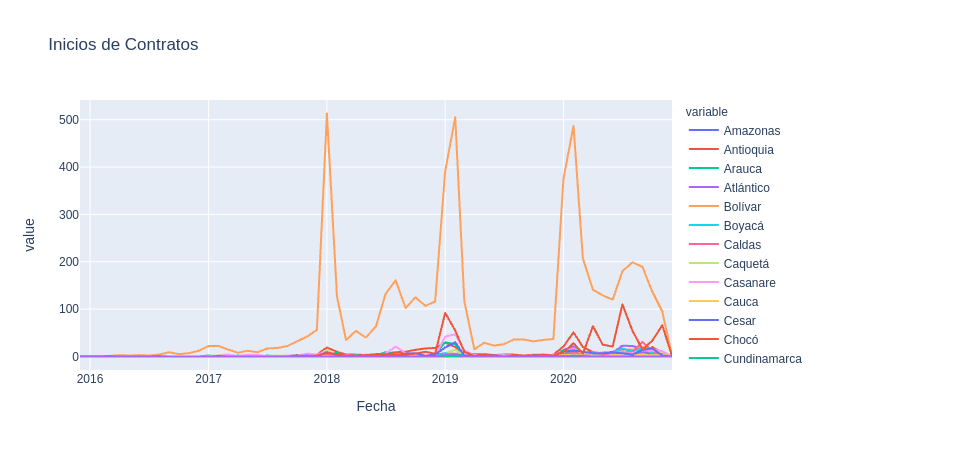

In [33]:
fig = px.line(DFfechas, x='Fecha', y=DFfechas.columns[1:-1],
              hover_data={"Fecha": "|%B, %Y"},
              title='Inicios de Contratos')

fig.show()

In [34]:
df['Fecha de Inicio del Contrato']=df['Fecha de Inicio del Contrato'].dt.strftime('%d/%m/%Y')

In [35]:
df[Fechas].dtypes

Fecha de Firma                  datetime64[ns]
Fecha de Inicio del Contrato            object
Fecha de Fin del Contrato       datetime64[ns]
Fecha de Inicio de Ejecucion    datetime64[ns]
Fecha de Fin de Ejecucion       datetime64[ns]
dtype: object

### Estadísticos fundamentales

Ahora calcularemos algunos estadísticos sencillos, nos encontraremos con problemas en este caso particular por la información que contiene esta base.

In [36]:
estadisticos=df.describe()
estadisticos

Nit Entidad  Valor del Contrato  Valor de pago adelantado  \
count           10000.0             10000.0                   10000.0   
mean    1771870558.2688    46419181330.4791               323736.6635   
std   2522945966.874257  4191280723613.0317        14619269.517517764   
min           5432567.0                 0.0                       0.0   
25%         860061099.0           8254950.0                       0.0   
50%         899999034.0          18856038.5                       0.0   
75%         900463725.0          39608509.5                       0.0   
max        9013620904.0   417912160410000.0              1325000000.0   

         Valor Facturado  Valor Pendiente de Pago       Valor Pagado  \
count            10000.0                  10000.0            10000.0   
mean       16655189.9958           116123513.5847      13563155.8282   
std   262472718.08215424       1472477047.1975043 256597165.28337044   
min                  0.0              -29750000.0                0.0   
25%                  0.0                4781836.0                0.0   
50%                  0.0               13055155.0                0.0   
75%           4175658.25               31942549.0                0.0   
max        22325067246.0            92541024083.0      22325067246.0   

        Valor Amortizado  Valor Pendiente de Amortizacion  \
count            10000.0                          10000.0   
mean          12286.6269                      311450.0366   
std   1228662.6899999997               14567809.832855182   
min                  0.0                              0.0   
25%                  0.0                              0.0   
50%                  0.0                              0.0   
75%                  0.0                              0.0   
max          122866269.0                     1325000000.0   

       Valor Pendiente de Ejecucion          Saldo CDP     Saldo Vigencia  \
count                       10000.0            10000.0            10000.0   
mean                  123172707.438  8014081269.820444    1408509080.7922   
std              1499323227.4623344 183683701624.90347 30748807021.931572   
min                     -20750000.0                0.0                0.0   
25%                      6017085.75          8259059.5                0.0   
50%                      16000000.0         31179966.0                0.0   
75%                      36837750.0       199539214.25                0.0   
max                   92541024083.0    6750000000576.0     800546210292.0   

       Dias Adicionados  
count           10000.0  
mean             8.3099  
std   32.84769336020277  
min                 0.0  
25%                 0.0  
50%                 0.0  
75%                 0.0  
max               426.0

Observe los cuantiles de la columna `Valor del Contrato`, es claro que hay una cantidad tremenda de datos atípicos, utilicemos otras médidas estadísticas para reconocer otras características de esta información:

In [37]:
mediarecortada=[]
quantil90=[]
for i in estadisticos.columns:
    mediarecortada.append(stats.trim_mean(df[i],0.1))

estadisticos.loc['med_rec']=mediarecortada
estadisticos.loc['quantil95']=df.quantile(0.95)
estadisticos

Nit Entidad  Valor del Contrato  Valor de pago adelantado  \
count               10000.0             10000.0                   10000.0   
mean        1771870558.2688    46419181330.4791               323736.6635   
std       2522945966.874257  4191280723613.0317        14619269.517517764   
min               5432567.0                 0.0                       0.0   
25%             860061099.0           8254950.0                       0.0   
50%             899999034.0          18856038.5                       0.0   
75%             900463725.0          39608509.5                       0.0   
max            9013620904.0   417912160410000.0              1325000000.0   
med_rec       996816729.522     24671878.023125                       0.0   
quantil95      8999990619.0  215782659.94999984                       0.0   

             Valor Facturado  Valor Pendiente de Pago       Valor Pagado  \
count                10000.0                  10000.0            10000.0   
mean           16655189.9958           116123513.5847      13563155.8282   
std       262472718.08215424       1472477047.1975043 256597165.28337044   
min                      0.0              -29750000.0                0.0   
25%                      0.0                4781836.0                0.0   
50%                      0.0               13055155.0                0.0   
75%               4175658.25               31942549.0                0.0   
max            22325067246.0            92541024083.0      22325067246.0   
med_rec        2820604.33675          18525493.953125       1389527.4685   
quantil95 42943054.999999955       190011060.49999985 34240452.599999964   

            Valor Amortizado  Valor Pendiente de Amortizacion  \
count                10000.0                          10000.0   
mean              12286.6269                      311450.0366   
std       1228662.6899999997               14567809.832855182   
min                      0.0                              0.0   
25%                      0.0                              0.0   
50%                      0.0                              0.0   
75%                      0.0                              0.0   
max              122866269.0                     1325000000.0   
med_rec                  0.0                              0.0   
quantil95                0.0                              0.0   

           Valor Pendiente de Ejecucion          Saldo CDP     Saldo Vigencia  \
count                           10000.0            10000.0            10000.0   
mean                      123172707.438  8014081269.820444    1408509080.7922   
std                  1499323227.4623344 183683701624.90347 30748807021.931572   
min                         -20750000.0                0.0                0.0   
25%                          6017085.75          8259059.5                0.0   
50%                          16000000.0         31179966.0                0.0   
75%                          36837750.0       199539214.25                0.0   
max                       92541024083.0    6750000000576.0     800546210292.0   
med_rec                   21405833.3715 191128755.08843875                0.0   
quantil95            192007544.84999877  6487053903.449995                0.0   

           Dias Adicionados  
count               10000.0  
mean                 8.3099  
std       32.84769336020277  
min                     0.0  
25%                     0.0  
50%                     0.0  
75%                     0.0  
max                   426.0  
med_rec            0.047125  
quantil95              61.0

Debemos hacer un filtro según la variable `Valor del Contrato`que me permita extraer esos datos que estan afectado las medidas estadísticas que estoy estudiando.

In [38]:
ncontracts=df[df['Valor del Contrato']<215000000]

### Empecemos con la visualización

Ahora vamos a hacer algunas visualizaciones sobre la base, empecemos con la distribución por Sector de la Variable `Valor del Contrato`:

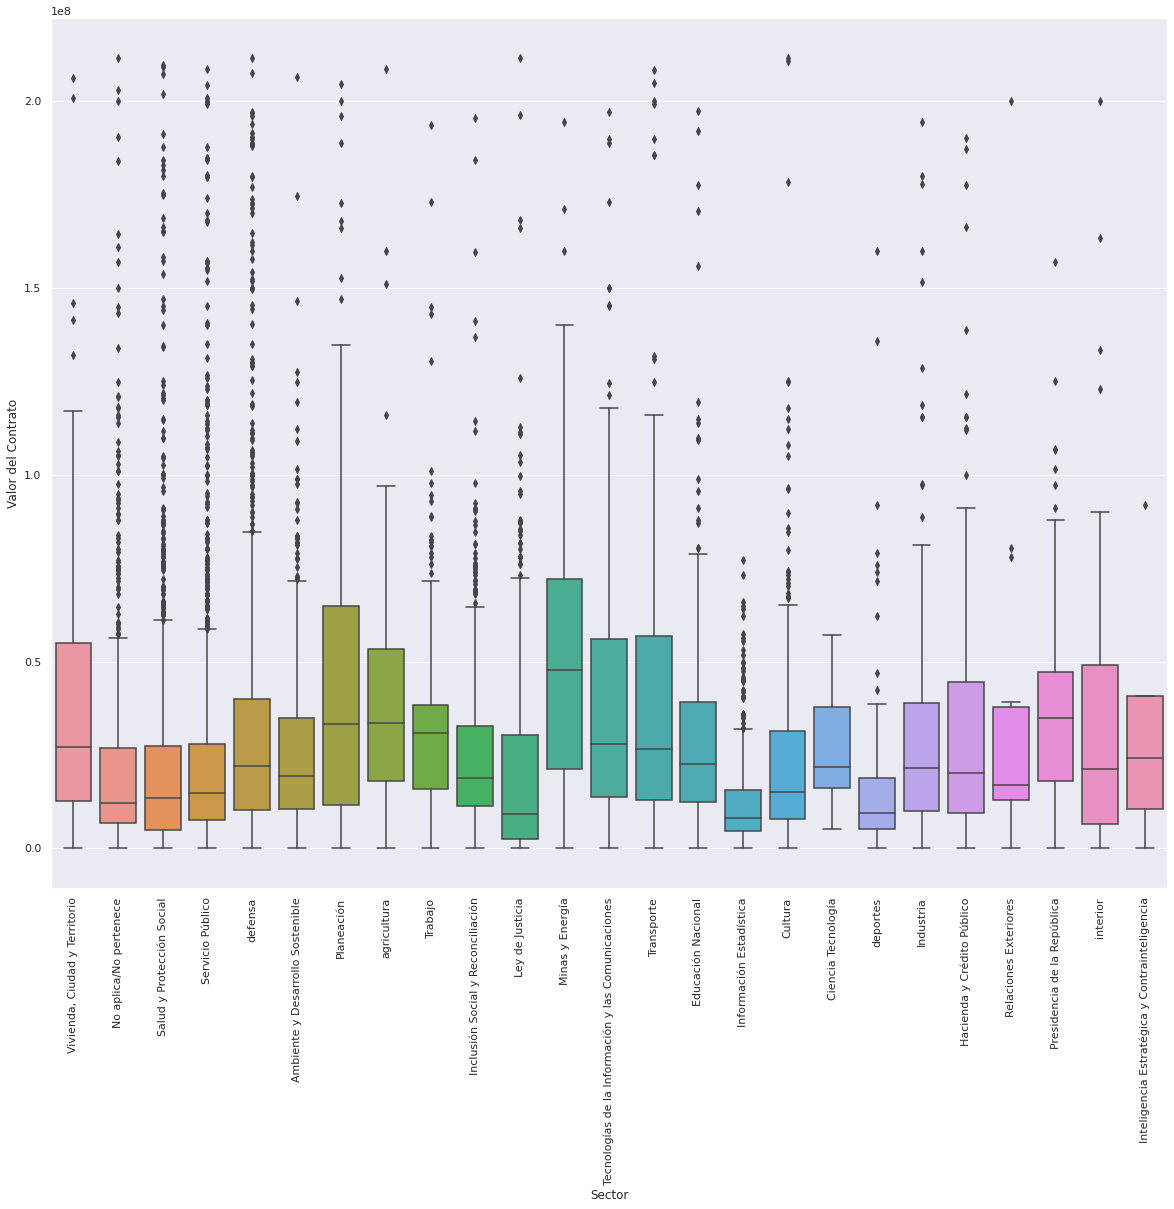

In [39]:
fig, axs = plt.subplots(figsize=(20,16))
axs=sns.boxplot(data=ncontracts,y='Valor del Contrato',x="Sector")
axs.set_xticklabels(axs.get_xticklabels(), rotation=90);

Tenga cuidado porque este gráfico expresa la distribución por Sector de los Valores de Contratos, pero no nos habla del total por sector, veamos:

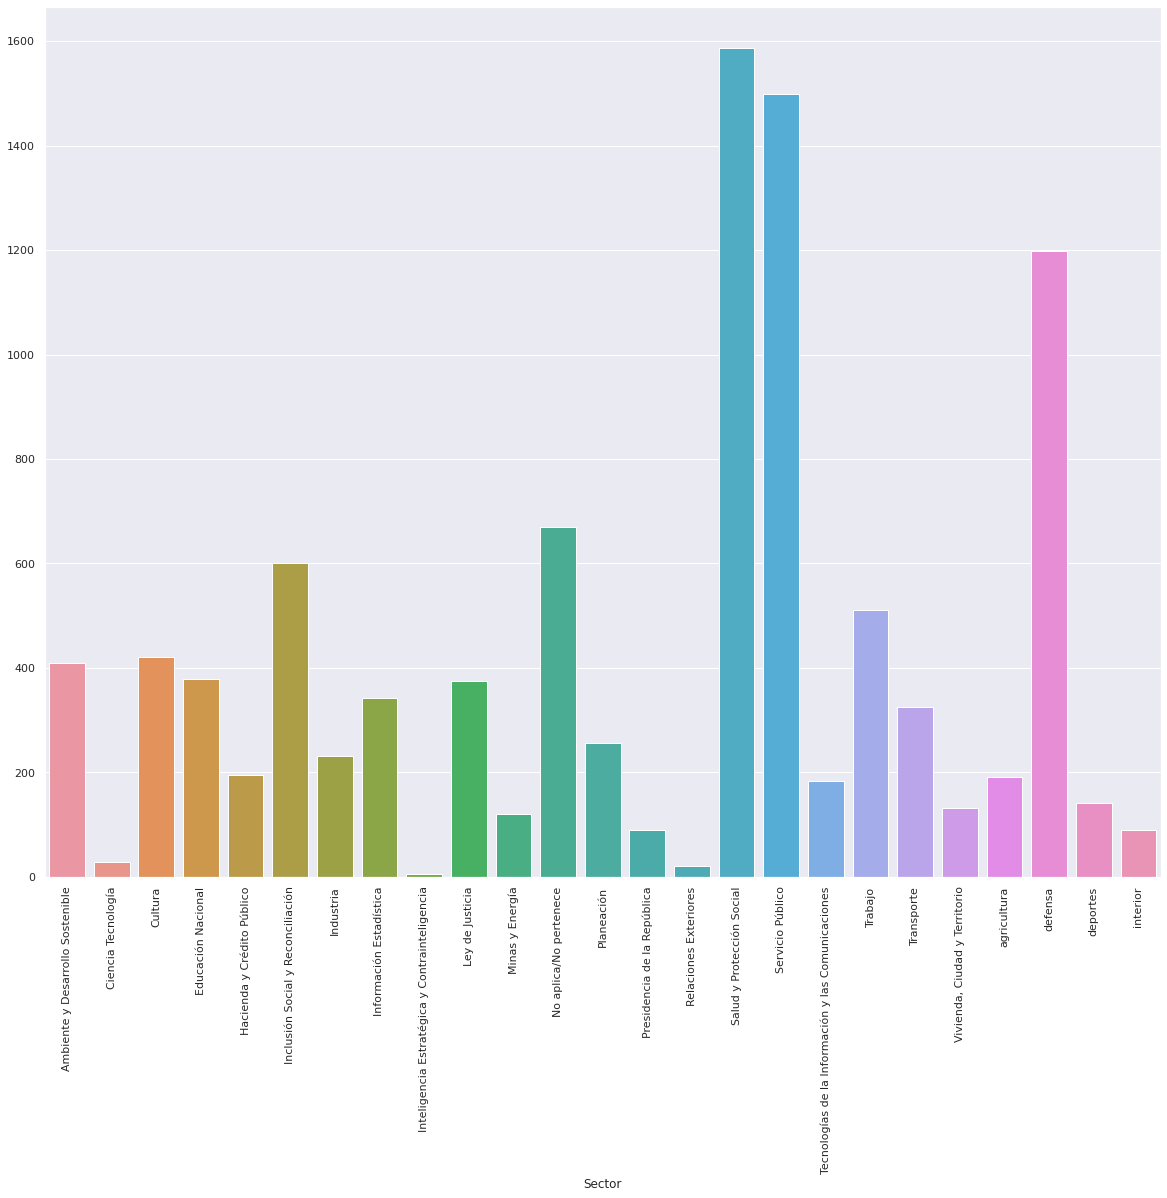

In [40]:
fig, axs = plt.subplots(figsize=(20,16))
axs=sns.barplot(y=df.groupby(by='Sector').size().values,x=df.groupby(by='Sector').size().index)
axs.set_xticklabels(axs.get_xticklabels(), rotation=90);

In [41]:
ncontracts.groupby(by='Sector').sum()['Valor del Contrato']

Sector
Ambiente y Desarrollo Sostenible                      11092518071
Ciencia Tecnología                                      575915593
Cultura                                                9674977316
Educación Nacional                                    11206337249
Hacienda y Crédito Público                             5902990891
Inclusión Social y Reconciliación                     14821380143
Industria                                              6724493995
Información Estadística                                4462837327
Inteligencia Estratégica y Contrainteligencia           167205340
Ley de Justicia                                        8128079271
Minas y Energía                                        5408395844
No aplica/No pertenece                                15032306343
Planeación                                             9782870527
Presidencia de la República                            3359481196
Relaciones Exteriores                                   653905231
Sal

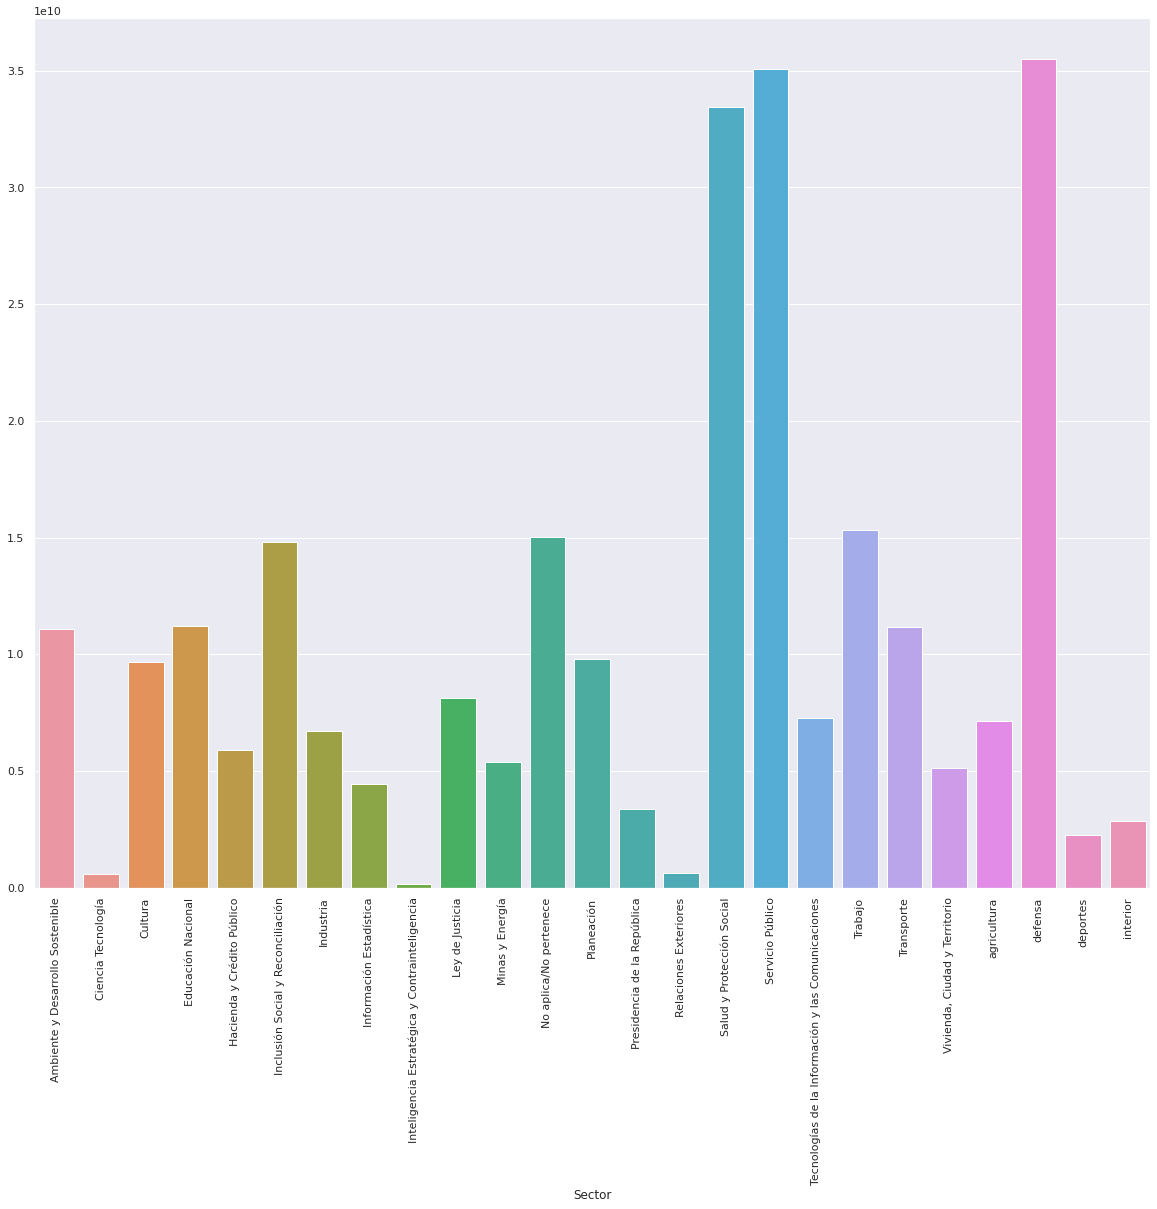

In [42]:
fig, axs = plt.subplots(figsize=(20,16))
axs=sns.barplot(y=ncontracts.groupby(by='Sector').sum()['Valor del Contrato'].values,x=ncontracts.groupby(by='Sector').sum()['Valor del Contrato'].index)
axs.set_xticklabels(axs.get_xticklabels(), rotation=90);

También lo podemos hacer por Departamento:

In [43]:
def sectorvsdepto(i):
    fbase=ncontracts[ncontracts['Departamento']==i]
    fig, axs = plt.subplots(figsize=(20,16))
    axs=sns.barplot(y=fbase.groupby(by='Sector').sum()['Valor del Contrato'].values,x=fbase.groupby(by='Sector').sum()['Valor del Contrato'].index)
    axs.set_xticklabels(axs.get_xticklabels(), rotation=90);
    plt.show()
    return 
interact(sectorvsdepto,i=ncontracts['Departamento'].unique())

interactive(children=(Dropdown(description='i', options=('Distrito Capital de Bogotá', 'Meta', 'Cundinamarca',…

<function __main__.sectorvsdepto(i)>

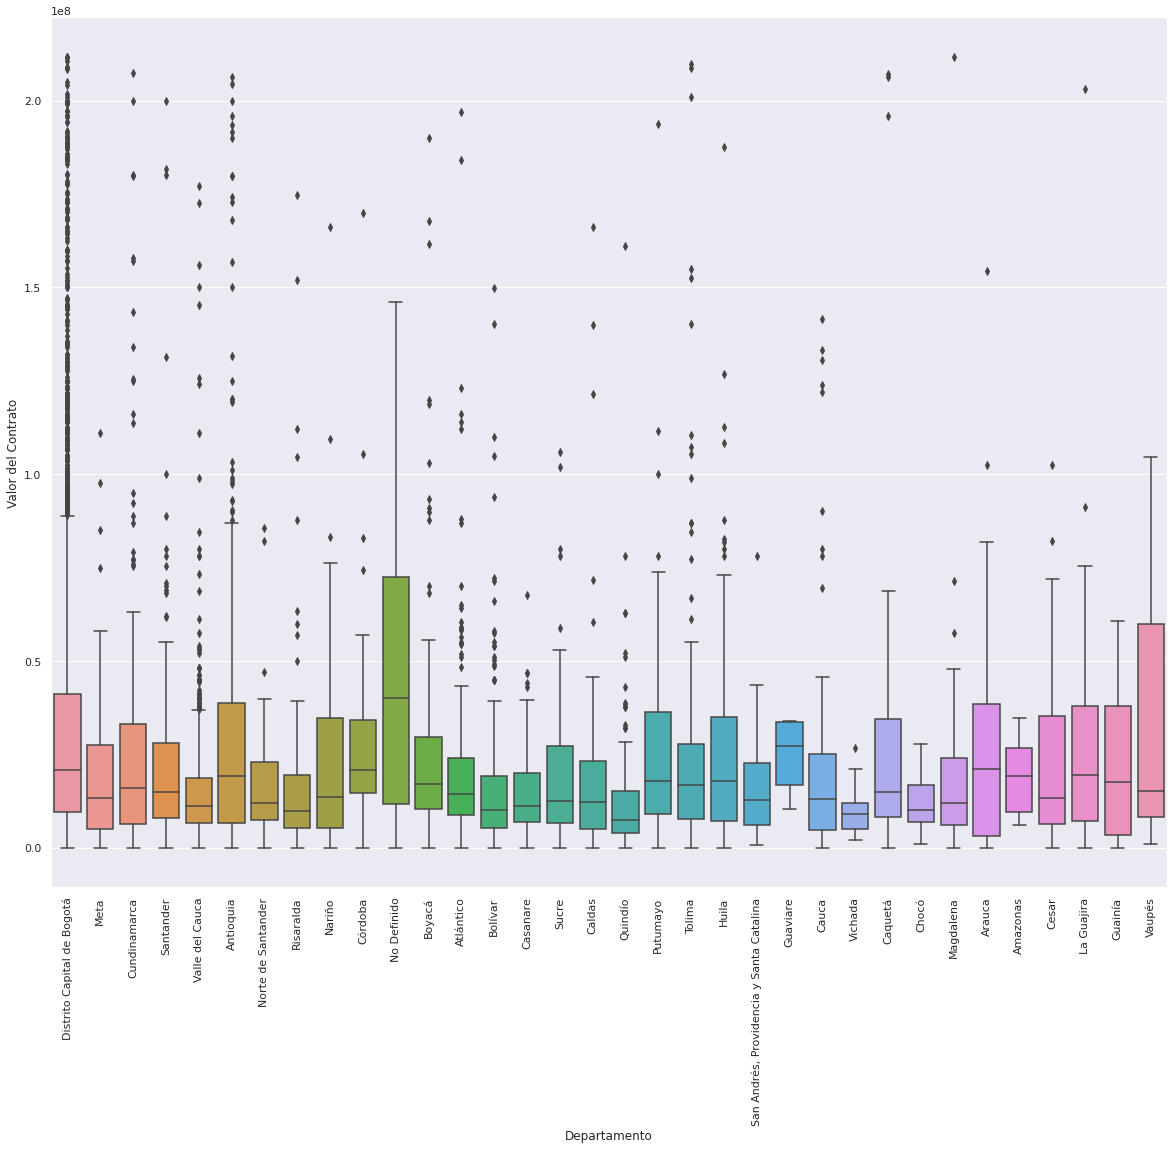

In [44]:
fig, axs = plt.subplots(figsize=(20,16))
axs=sns.boxplot(data=ncontracts,y='Valor del Contrato',x="Departamento")
axs.set_xticklabels(axs.get_xticklabels(), rotation=90);

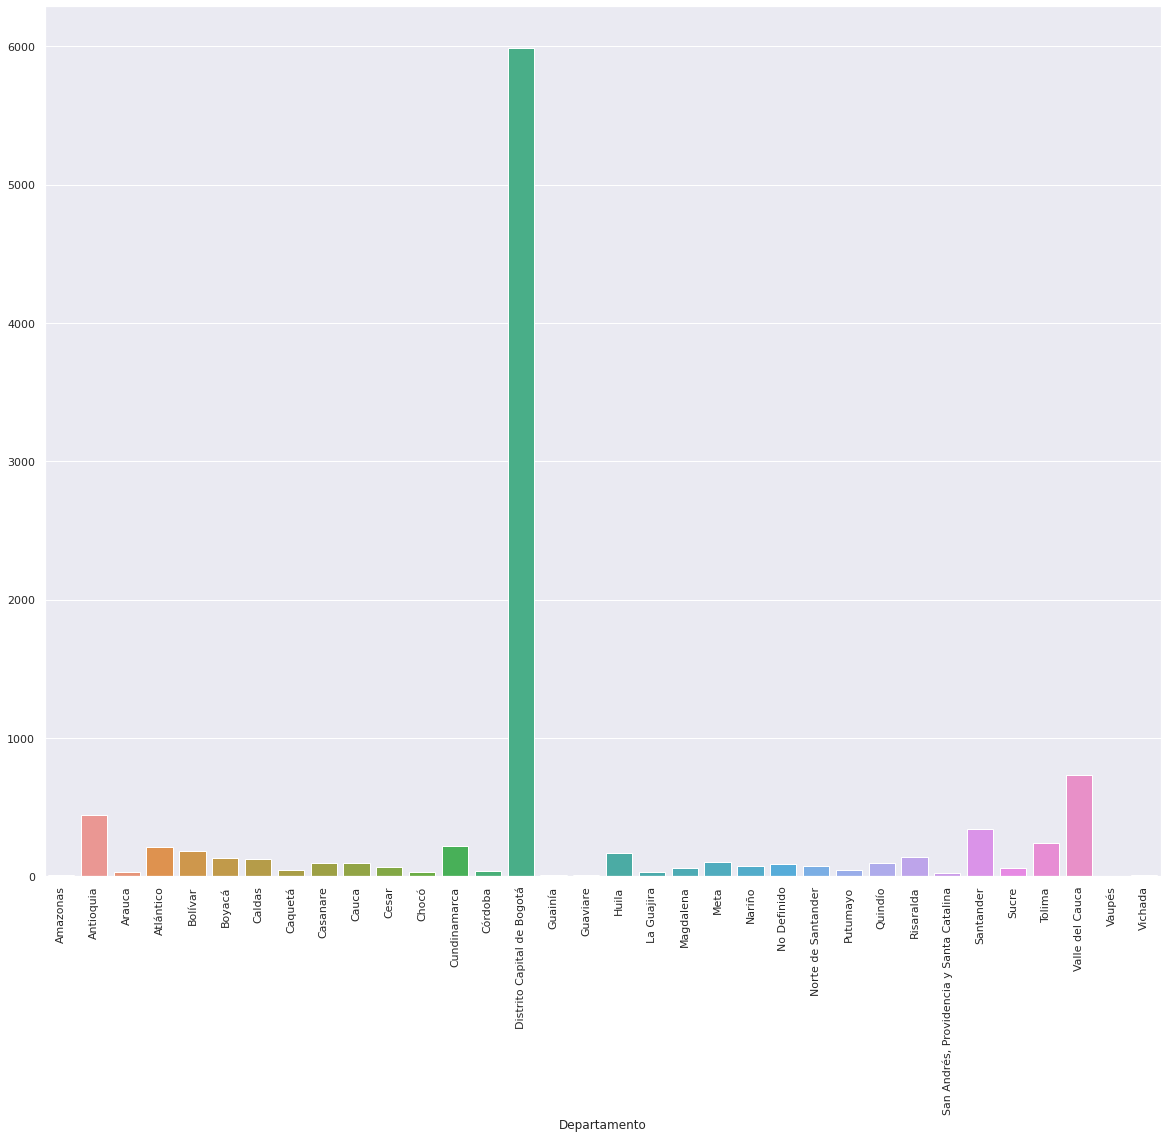

In [45]:
fig, axs = plt.subplots(figsize=(20,16))
axs=sns.barplot(y=df.groupby(by='Departamento').size().values,x=df.groupby(by='Departamento').size().index)
axs.set_xticklabels(axs.get_xticklabels(), rotation=90);

## Comparar Variables

También podemos contrastar variables, hay varias formas de lograrlo, en este caso una cuantitativa con una cualitativa:

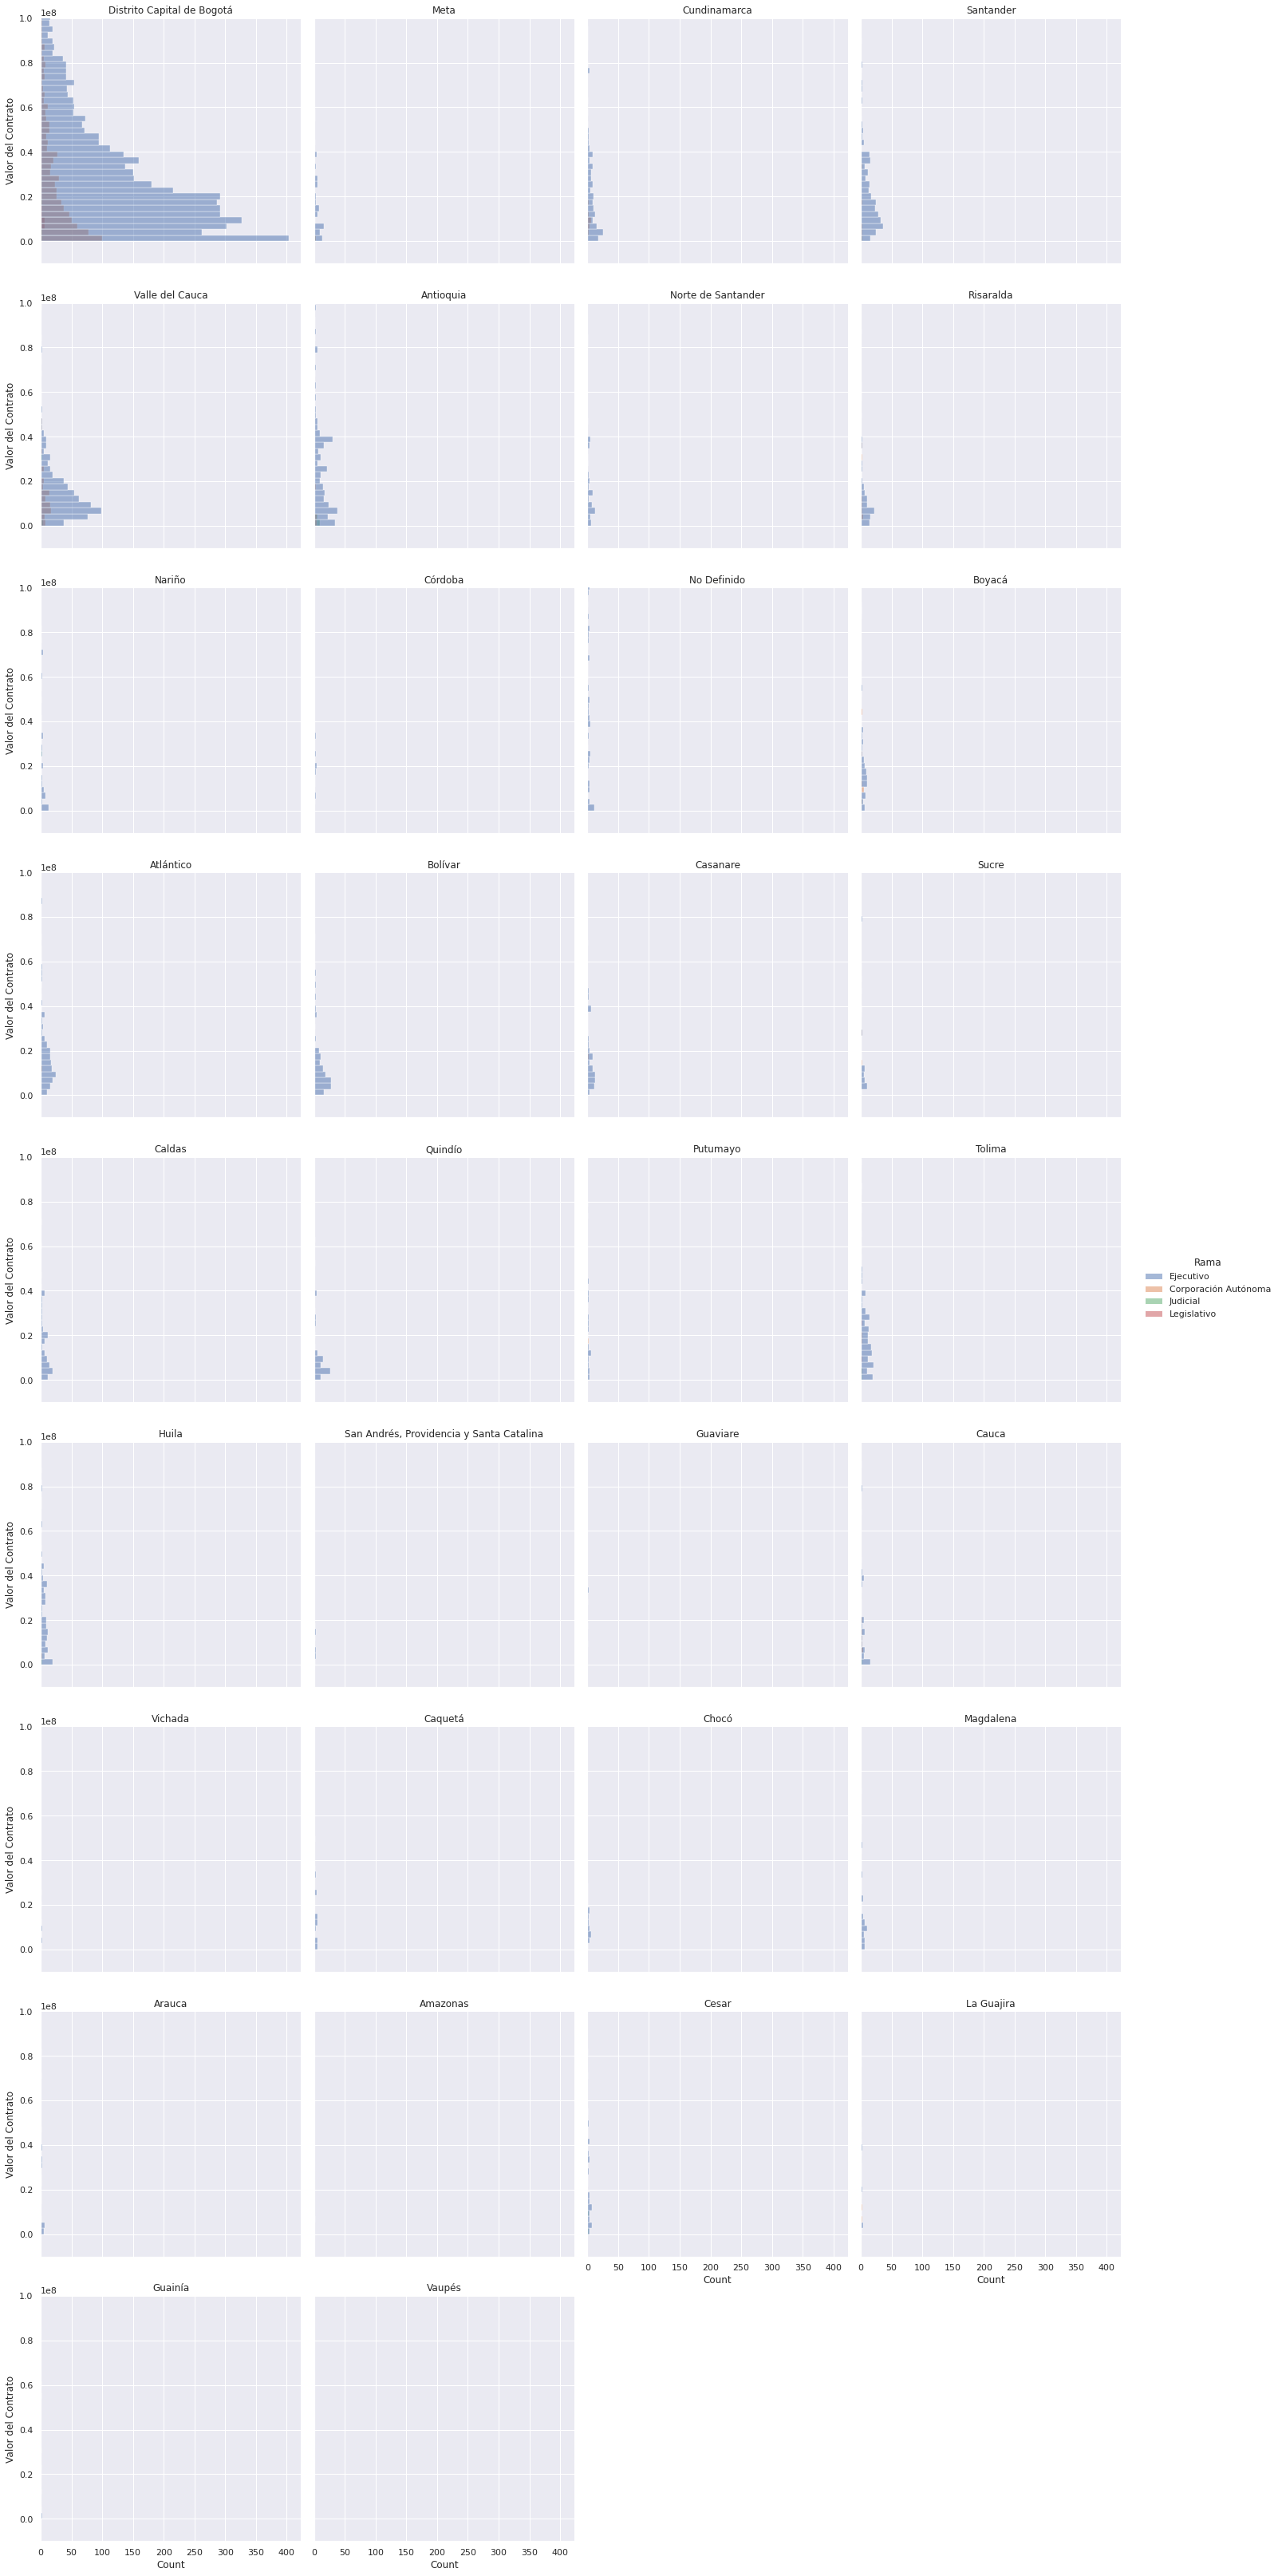

In [46]:
g = sns.displot(
    data=ncontracts, y="Valor del Contrato", hue="Rama", col="Departamento",col_wrap=4)
g.set_titles("{col_name}")
g.set(ylim=(-1e7,1e8))

Escojamos algunas columnas adecuadas:

In [47]:
cuanticolumns=df.select_dtypes(exclude=['object']).columns
cuanticolumns

Index(['Nit Entidad', 'Fecha de Firma', 'Fecha de Fin del Contrato',
       'Fecha de Inicio de Ejecucion', 'Fecha de Fin de Ejecucion',
       'Valor del Contrato', 'Valor de pago adelantado', 'Valor Facturado',
       'Valor Pendiente de Pago', 'Valor Pagado', 'Valor Amortizado',
       'Valor Pendiente de Amortizacion', 'Valor Pendiente de Ejecucion',
       'Saldo CDP', 'Saldo Vigencia', 'Dias Adicionados', 'Mes_Año'],
      dtype='object')

In [48]:
cuanticolumns=cuanticolumns.drop('Nit Entidad')
cuanticolumns

Index(['Fecha de Firma', 'Fecha de Fin del Contrato',
       'Fecha de Inicio de Ejecucion', 'Fecha de Fin de Ejecucion',
       'Valor del Contrato', 'Valor de pago adelantado', 'Valor Facturado',
       'Valor Pendiente de Pago', 'Valor Pagado', 'Valor Amortizado',
       'Valor Pendiente de Amortizacion', 'Valor Pendiente de Ejecucion',
       'Saldo CDP', 'Saldo Vigencia', 'Dias Adicionados', 'Mes_Año'],
      dtype='object')

In [49]:
somecolumns=list(cuanticolumns[[0,4,5,-2,-1]])
somecolumns.append('Rama')

In [50]:
dfcuanti=ncontracts[somecolumns]

/home/isaac/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/home/isaac/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/home/isaac/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



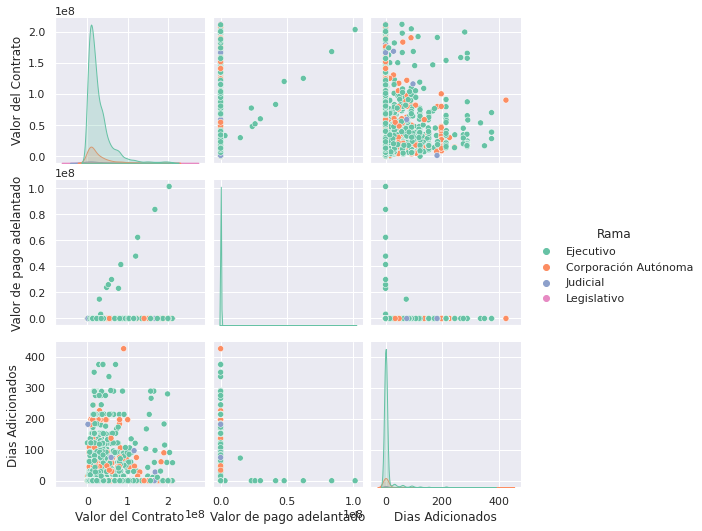

In [51]:
g = sns.pairplot(dfcuanti, hue="Rama", palette="Set2", diag_kind="kde", height=2.5)

## También podemos hacer mapas

Pero en este caso necesitamos Dataframe externos:

In [52]:
dfdeptos=ncontracts.groupby(by='Departamento').mean()
dfdeptos

Nit Entidad  \
Departamento                                                  
Amazonas                                  834146683.2857143   
Antioquia                                1708019376.5594938   
Arauca                                   1346697445.3214285   
Atlántico                                     1194165534.25   
Bolívar                                   905251326.0988373   
Boyacá                                   2345297407.6666665   
Caldas                                   1009660278.1913043   
Caquetá                                   823318725.3541666   
Casanare                                  878082830.3333334   
Cauca                                     954083979.8043479   
Cesar                                     860298861.9836066   
Chocó                                         1184210082.76   
Cundinamarca                             1078925637.1327014   
Córdoba                                   843508638.9210526   
Distrito Capital de Bogotá               2143312649.3947923   
Guainía                                         885749338.5   
Guaviare                                       3741229497.6   
Huila                                     912324631.4213836   
La Guajira                                975582230.6785715   
Magdalena                                 2564639214.614035   
Meta                                      871399313.2772278   
Nariño                                    857691934.5492958   
No Definido                               892039848.2439024   
Norte de Santander                         957176078.761194   
Putumayo                                  1197328574.142857   
Quindío                                   873581911.1041666   
Risaralda                                 887047349.9776119   
San Andrés, Providencia y Santa Catalina  872980894.4347826   
Santander                                 973268302.4264264   
Sucre                                    1760572383.7547169   
Tolima                                   2370891213.3406115   
Valle del Cauca                          1174413824.9915373   
Vaupés                                    899999170.6666666   
Vichada                                   819629304.1111112   

                                          Valor del Contrato  \
Departamento                                                   
Amazonas                                  18881258.285714287   
Antioquia                                 31168198.179746836   
Arauca                                    29343104.785714287   
Atlántico                                 22478998.715686273   
Bolívar                                   18162225.848837208   
Boyacá                                          27284212.725   
Caldas                                    18727723.834782608   
Caquetá                                   32116115.833333332   
Casanare                                  15992788.333333334   
Cauca                                      23113470.54347826   
Cesar                                      22952009.31147541   
Chocó                                            11673472.76   
Cundinamarca                              27887346.914691944   
Córdoba                                   30544606.684210528   
Distrito Capital de Bogotá                31006580.771815624   
Guainía                                           23550868.5   
Guaviare                                          24407340.0   
Huila                                     25098851.641509432   
La Guajira                                31086160.285714287   
Magdalena                                  19936248.42105263   
Meta                                      19638460.316831682   
Nariño                                     25058514.46478873   
No Definido                                44695278.36585366   
Norte de Santander                        17410294.179104477   
Putumayo                                  29537129.404761903   
Quindío                                   14765128.

In [53]:
url='https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/3aadedf47badbdac823b00dbe259f6bc6d9e1899/colombia.geo.json'
Colombia_map=geopandas.read_file(url)

NameError: name 'geopandas' is not defined

In [ ]:
Colombia_map

In [ ]:
Colombia_map.plot()

In [ ]:
import re
from unicodedata import normalize

In [ ]:
dfdeptos.index=[normalize("NFKD", i).encode("ascii","ignore").decode("ascii").upper().replace('DISTRITO CAPITAL DE BOGOTA','SANTAFE DE BOGOTA D.C').replace('SAN ANDRES, PROVIDENCIA Y SANTA CATALINA','ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA').replace('NARINO','NARIÑO') for i in dfdeptos.index]
dfdeptos

In [ ]:
vmc=[]
for i in Colombia_map['NOMBRE_DPT']:
    vmc.append(dfdeptos['Valor del Contrato'][i])
print(vmc)
Colombia_map['Valor promedio']=vmc
Colombia_map

In [ ]:
fig, ax = plt.subplots(1, 1,figsize=(20,16))
Colombia_map = Colombia_map.to_crs(epsg=3857)
Colombia_map.plot(column='Valor promedio', ax=ax, legend=True,alpha=0.5)
ctx.add_basemap(ax,zoom=5)
ctx.add_basemap(ax)
ax.set_axis_off()